<a href="https://colab.research.google.com/github/siddharth0517/Student-Performance-Prediction/blob/main/Student_Performance_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Prediction

**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Importing Dataset**

In [3]:
dataset = pd.read_csv('Student_Performance.csv')

**3. Data Cleaning and EDA**

**Encoding The categorical Data**

In [17]:
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [19]:
dataset.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


*In Above Dataset there is no Missing Values*

**Detecting Outliers**

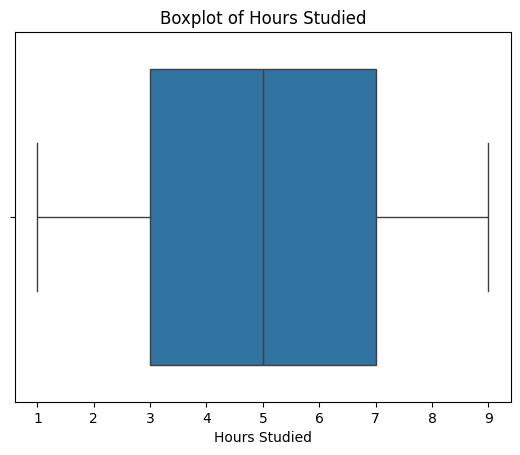

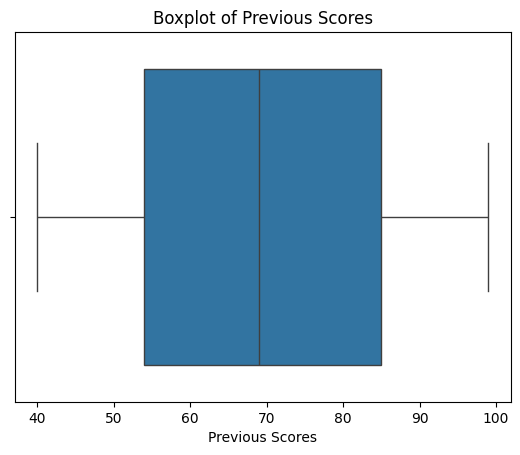

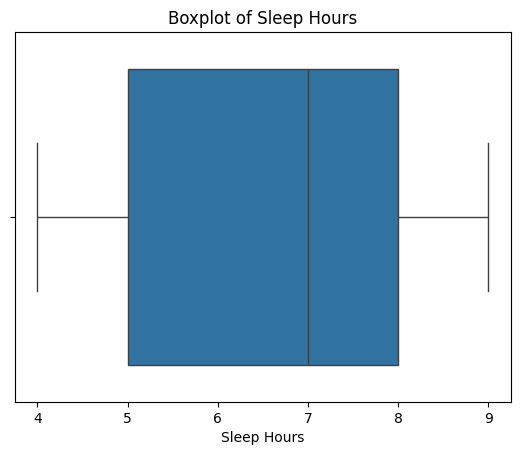

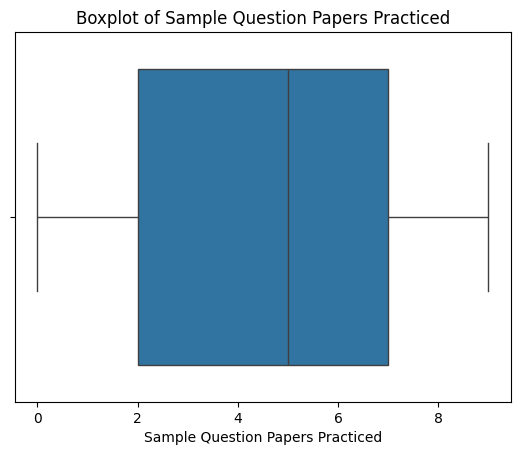

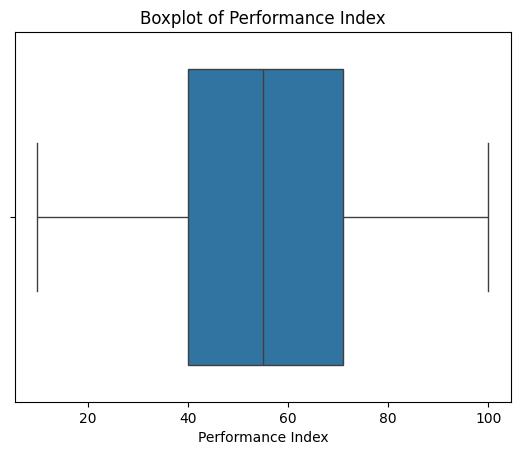

In [23]:
numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
for col in numeric_cols:
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

*There is No Outliers in Dataset*

**Distribution Of Features**

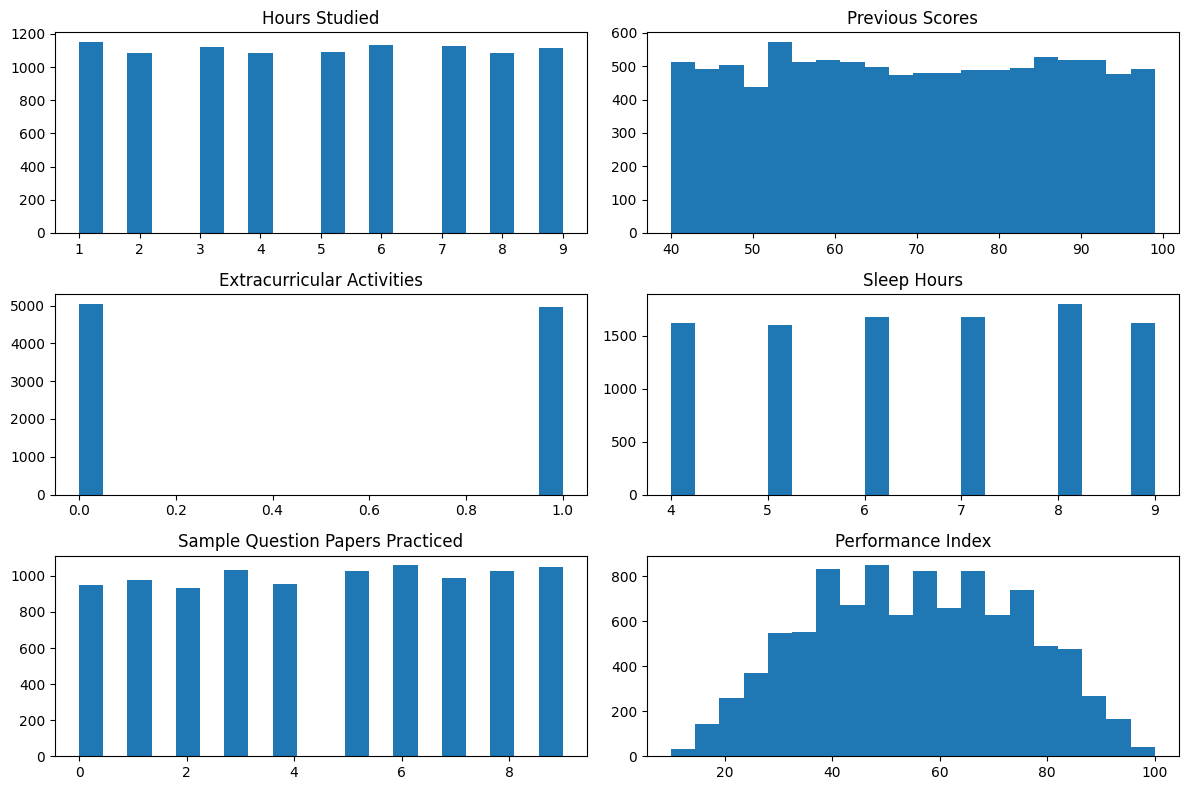

In [24]:
dataset.hist(bins=20, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

**Correlation Heatmap**

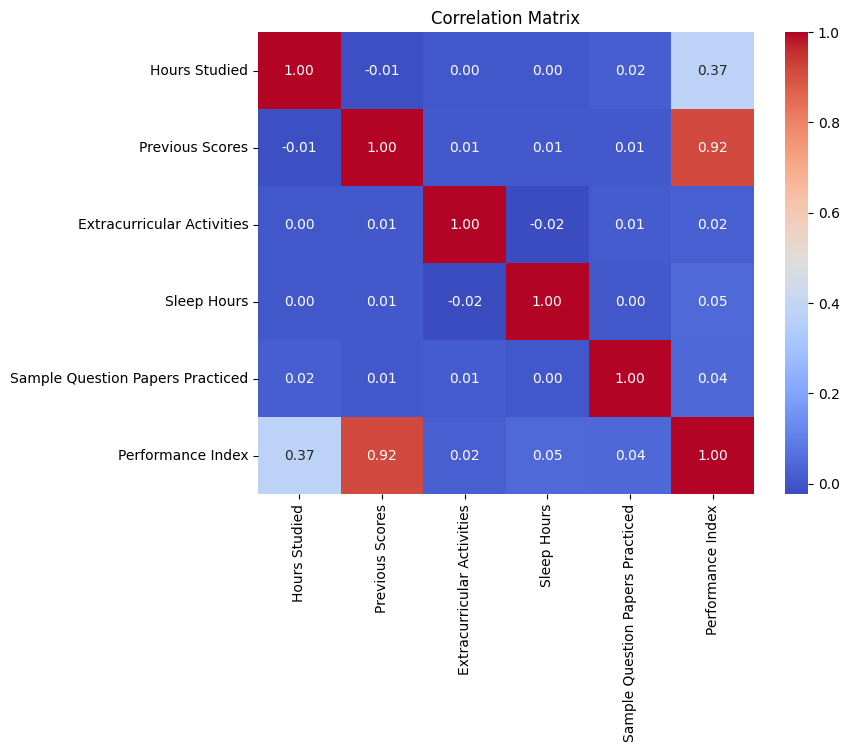

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Going With Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced as Main Features

**4. Splitting Dataset in Training and Testing**

In [28]:
X = dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
Y = dataset['Performance Index']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**5.  Training Linear Regression Model**

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**6. Training Random Forest Regressor**

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**7. Predicting Model**

In [33]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = model.predict(X_test)

**8. Evaluating Model**

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
# Evaluate Linear Regression
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression:
R² Score: 0.9879991283609477
RMSE: 2.032124185695317


In [37]:
# Evaluating Random Forest Regression
print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regressor:
R² Score: 0.9834999735194409
RMSE: 2.382792201367737


*Model Trained By Linear regression has high R squared value and less RMSE therefore its better*

**Visualization Real Vs Predicted**

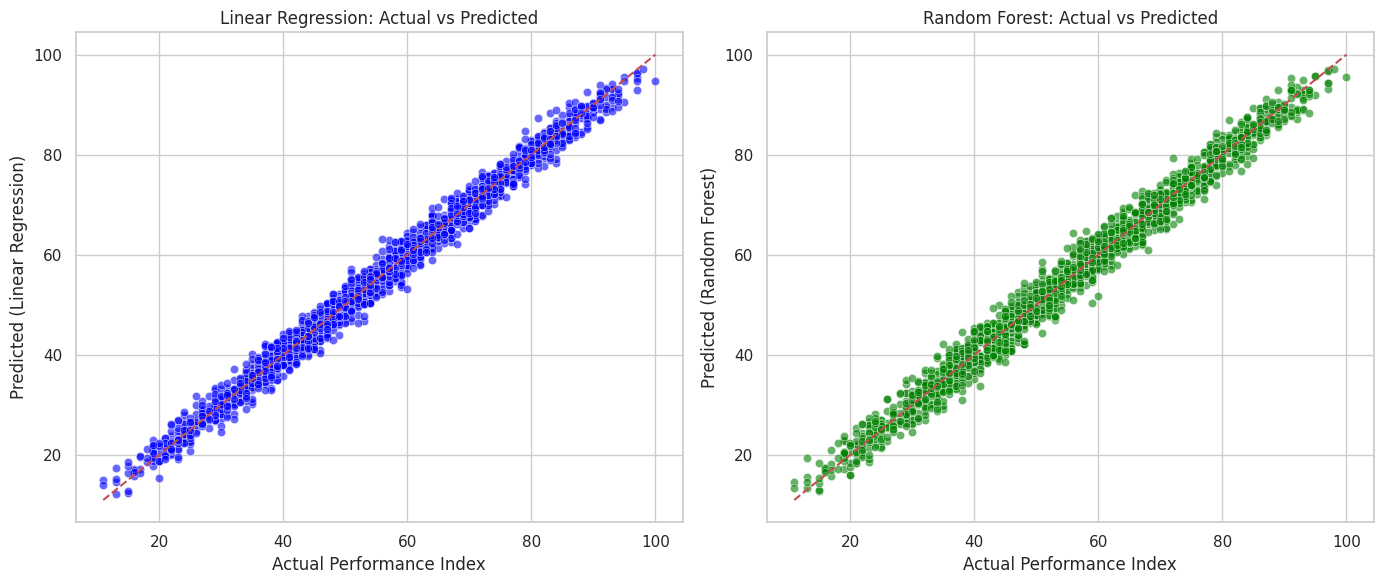

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted (Linear Regression)")
plt.title("Linear Regression: Actual vs Predicted")

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted (Random Forest)")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()

**Error Distribution**

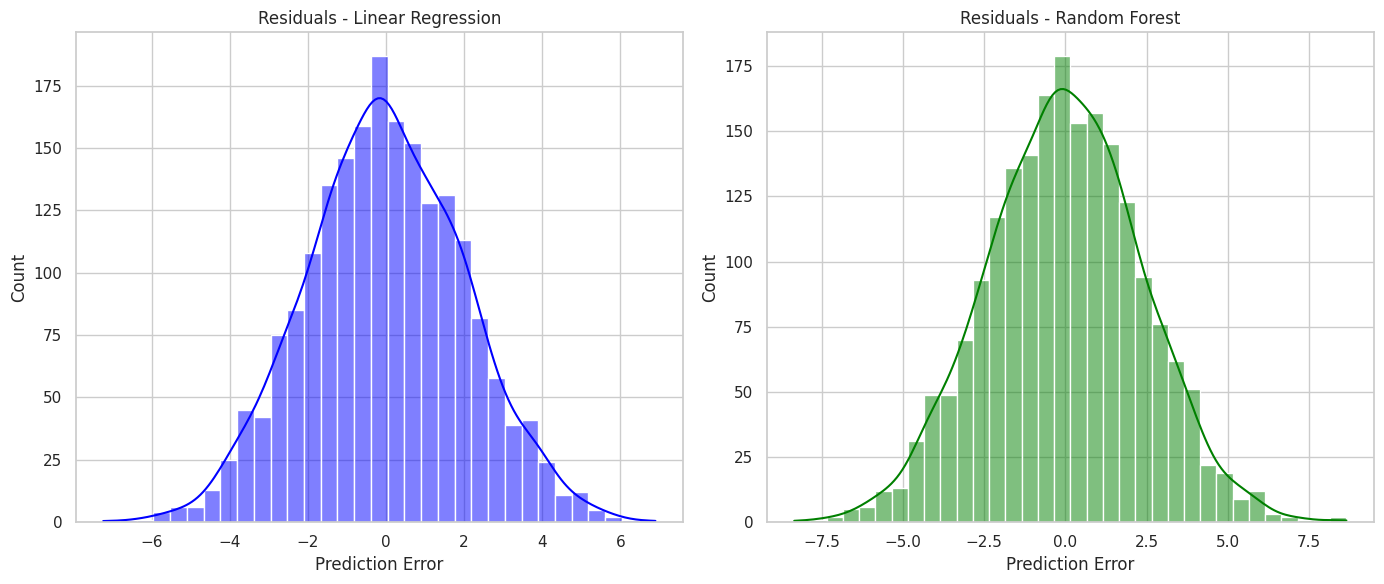

In [39]:
plt.figure(figsize=(14, 6))

# Residuals
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True, color='blue')
plt.title("Residuals - Linear Regression")
plt.xlabel("Prediction Error")

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True, color='green')
plt.title("Residuals - Random Forest")
plt.xlabel("Prediction Error")

plt.tight_layout()
plt.show()